## CS4243 Lab 1: Template Matching

**ASSIGNMENT SUBMISSION DEADLINE: Feb. 03, 23:59**

**Instructions:**
- See `lab1.pdf` and `lab1.py` for detailed descriptions.

- The functions to be implemented are given in `lab1.py`, with a description of each function. You will need to fill in the code where it is marked with the following:
    ```
    """ Your code starts here """

    """ Your code ends here """
    ```
- For open questions, write your answers directly into the notebook. 

- The test images are given in folder `data/input`.

- You are free to use NumPy functions, but you may not use `numpy.pad()` or other built-in functions of OpenCV aside from those already in the code template.


**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.8.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression()`, please do not change other codes in this notebook.

**Submission instructions:**

After you finish the code and get all the results: 

- Re-run this notebook (and make sure you get all the clean outputs), 
    
- Zip the same folder back and name it with your student ID (e.g. A0123456H.zip or A0123456H_A2345678J.zip if you are a group of 2), and 
    
- Submit to the NUS Canvas system. Please be careful since any failure to follow the submission guideline will result in a grade deduction.
    
If you have any question regarding this lab, do not hesistate to ask questions under the Labs section on Canvas Discussions. You can also attend any lab slot for FAQs.

## Part 1: Image preprossessing (15%)

**Goal**: Implement following functions and then run the code cells below.
- `rgb2gray()`: **(5%)**
- `gray2grad()`: **(5%)**
- `pad_zeros()`: **(5%)**

Relative error of gray2grad() (<1e-8 will be fine): 0.0


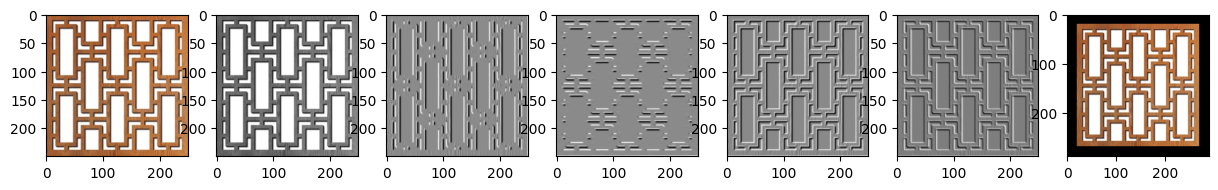

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2: Normalized Cross-Correlation (30%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation()`: **(10%)**
- `normalized_cross_correlation_fast()`: **(10%)**
- `normalized_cross_correlation_matrix()`: **(10%)**

Runtime of normalized_cross_correlation(): 5.303819s
Runtime of normalized_cross_correlation_fast(): 2.478251s
Runtime of normalized_cross_correlation_matrix(): 0.693630s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 1.1909463827539862e-05
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 1.1909463827539862e-05
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 1.1909463827539862e-05


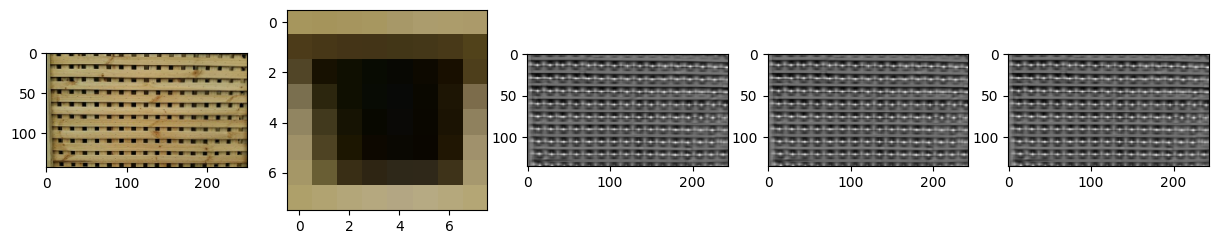

In [17]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) # downsample the input image to save computation cost
template = img[14:22, 12:20]

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])
# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

Runtime of normalized_cross_correlation(): 1.673521s
Runtime of normalized_cross_correlation_fast(): 0.817743s
Runtime of normalized_cross_correlation_matrix(): 0.060055s
Runtime of normalized_cross_correlation_ms(): 14.358046s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 1.414594949848661e-05
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 1.414594949848661e-05
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 1.414594949848661e-05
Relative error of normalized_cross_correlation_matrix_ms() (<1e-3 will be fine): 0.0001955765773208769


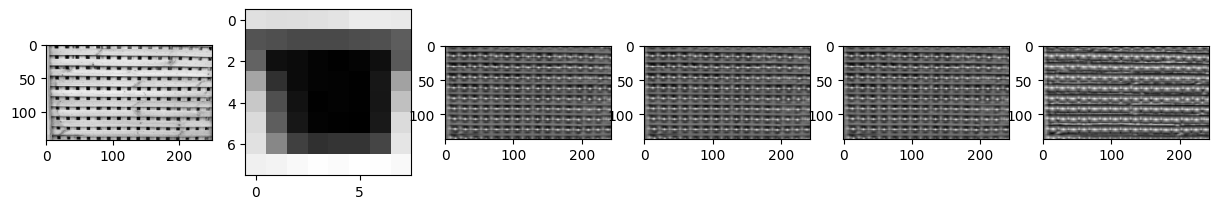

In [24]:
# Greyscale Test

import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5) # downsample the input image to save computation cost
template = img[14:22, 12:20]

img = lab1.rgb2gray(img)
template = lab1.rgb2gray(template)

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()
response_ms = lab1.normalized_cross_correlation_ms(img, template)
t5 = time.time()


print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))
print('Runtime of normalized_cross_correlation_ms(): %fs'%(t5-t4))


lab1.show_imgs([img, template, response, response_fast, response_matrix, response_ms])
# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))
print('Relative error of normalized_cross_correlation_matrix_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

## Part 3: Non-maximum Suppression (10%)

**Goal**: Implement following functions and then run the code cells below.
- `non_max_suppression()`

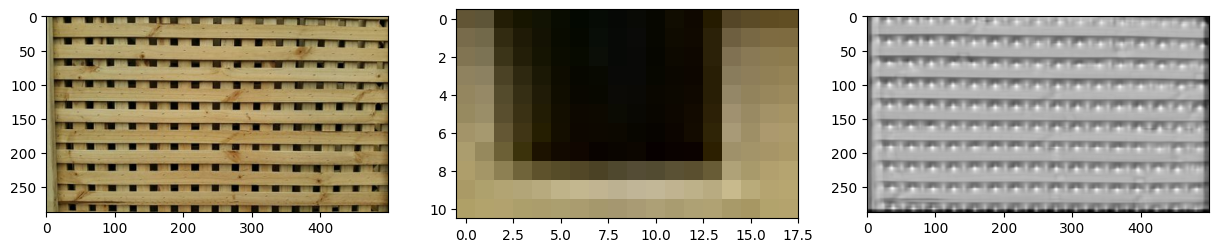

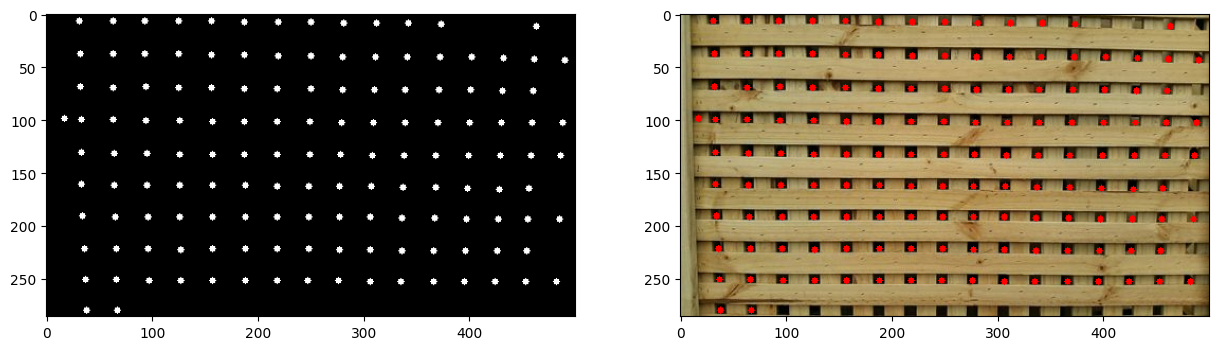

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'lattice.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[33:44, 24:42]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

## Part 4: Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

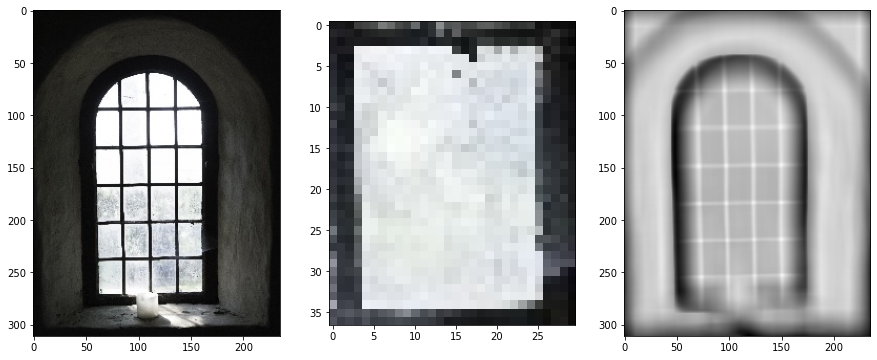

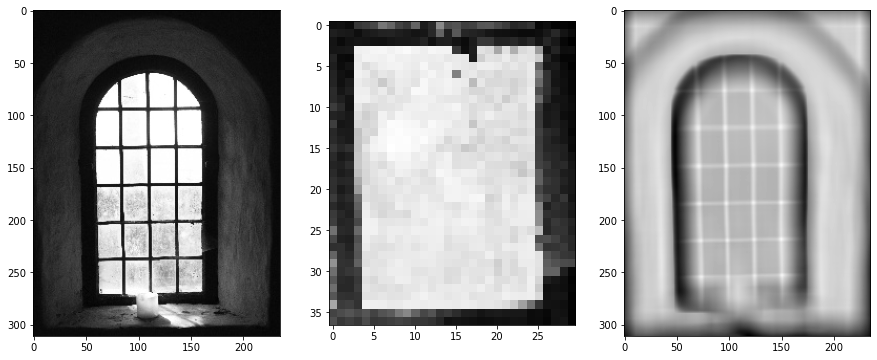

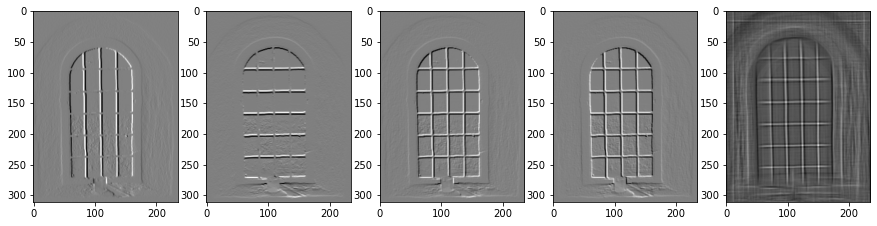

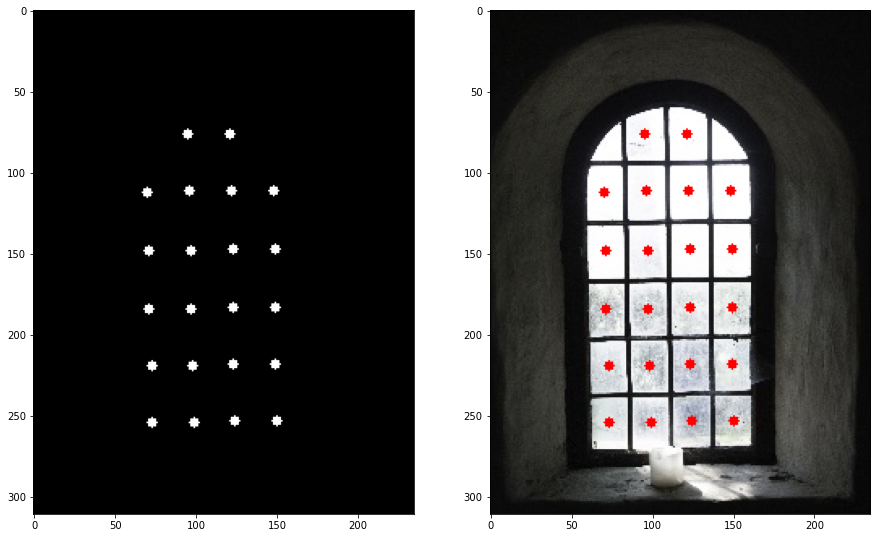

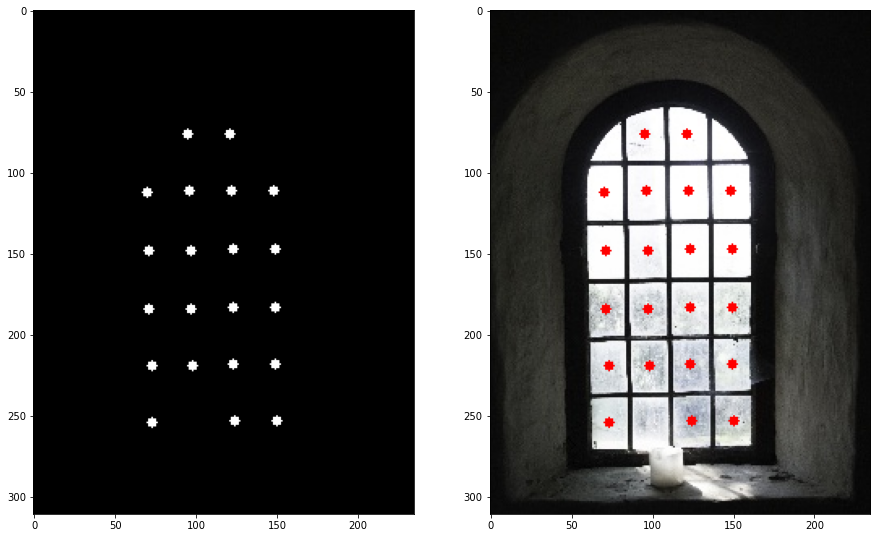

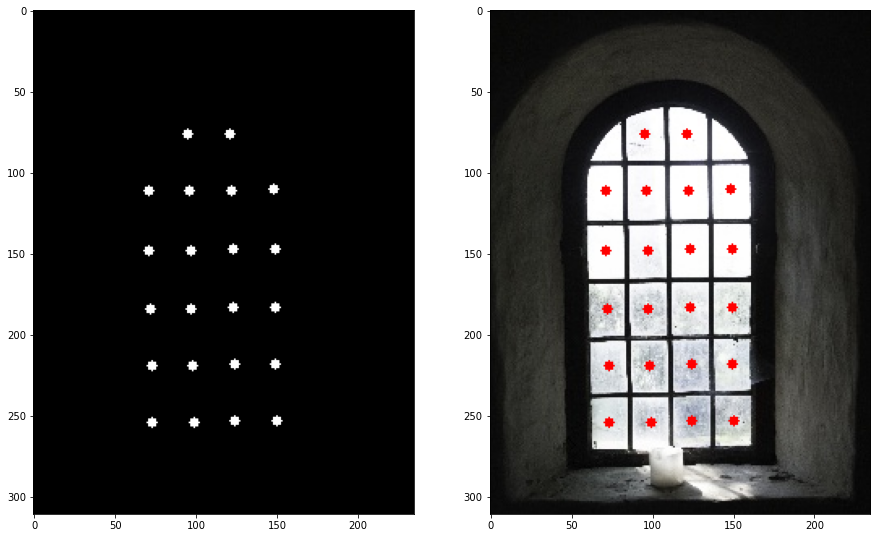

In [4]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
top, bottom, left, right = 200, 237, 135, 165
template = img[top:bottom, left:right]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[top:bottom, left:right]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[top:bottom, left:right]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.93)
lab1.show_img_with_points(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.94)
lab1.show_img_with_points(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

**QUESTION**: Explain why their response positions are different. **(6%)**

**ANSWER**:  The points are different as running show_img_with_points() with different templates would result in different maximas in the normalized cross-correlation. 

The templates supplied directly affects the matrix/ response calculated after running normalized cross-correlation on it. Essentially, the function returns a high value when a portion of the original image matches the template to a greater degree.

Afterwards, the non-maximum suppression formula helps to identify points with the highest correlation value, and marks them with a dot. 

Hence, changing the template image means that the formula is trying to match the original image with a different template. We can see this in where the dots are positioned when the template is changed.

The dots which signify the highest correlation value are found roughly in the middle of the matching template.

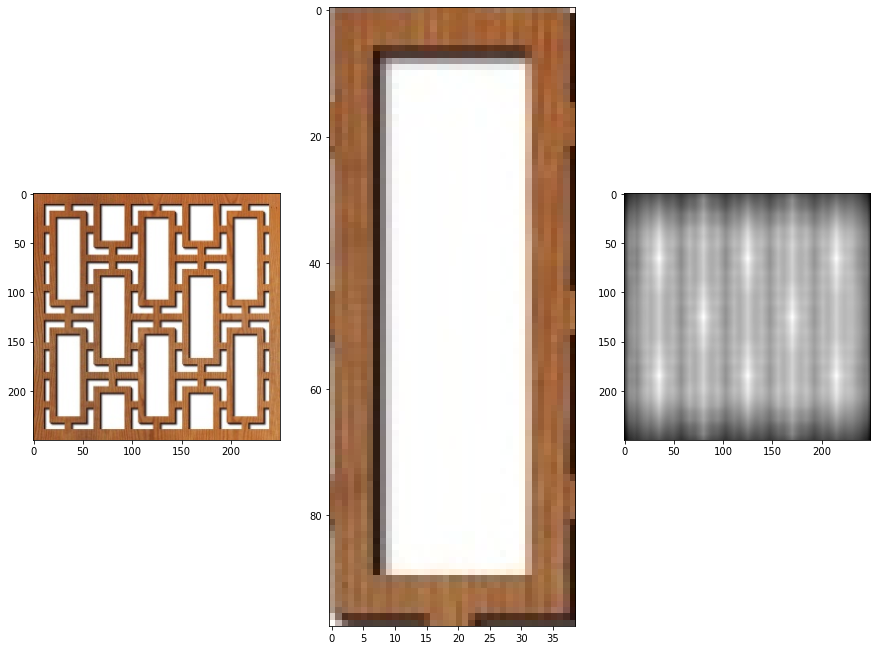

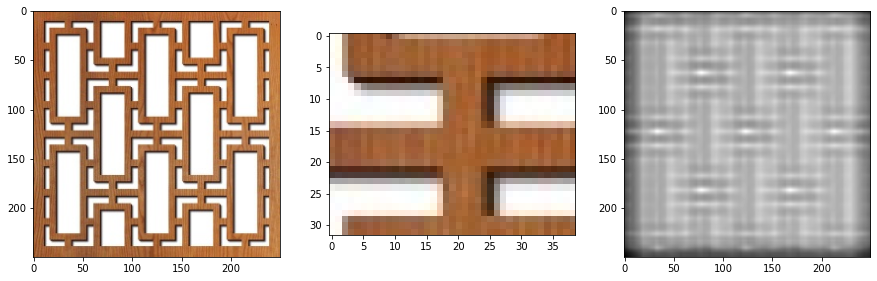

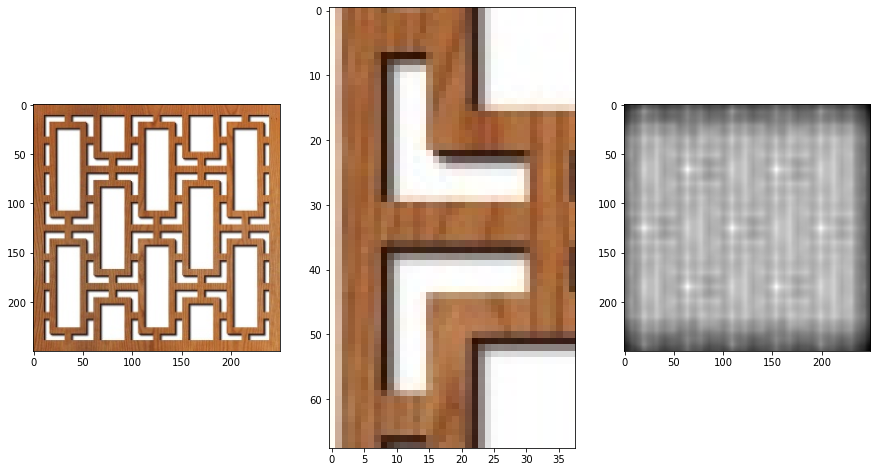

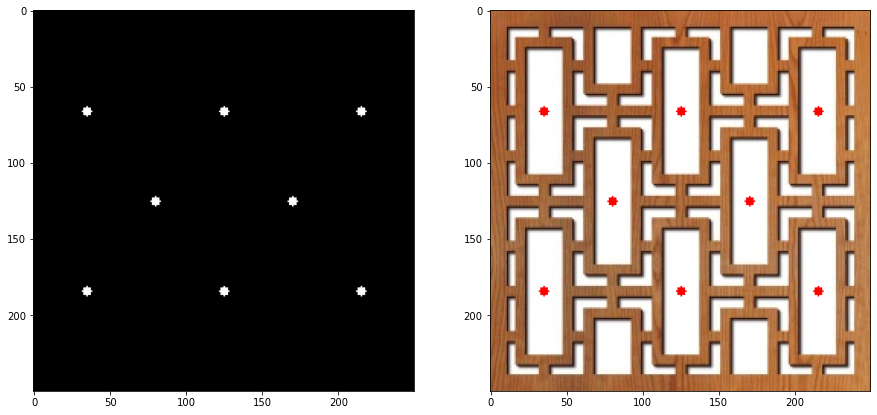

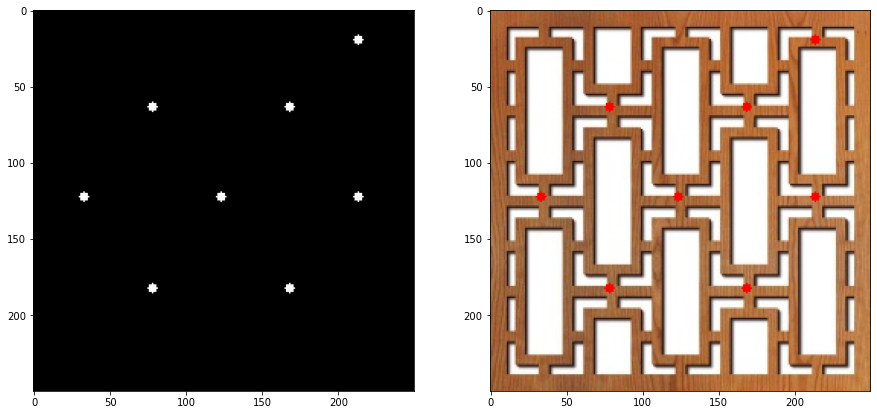

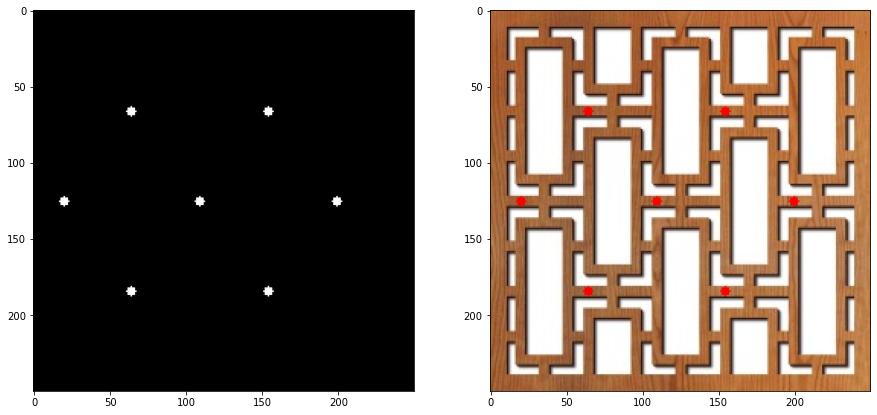

In [5]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'rectangular.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[77:175, 61:100]
template2 = img[48:80, 59:98]
template3 = img[92:160, 91:129]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)


# pad zeros to the image
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)


# pad zeros to the image
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
# perform match template
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

### 4.3 Template Size (6%）

**QUESTION**: How can each of these templates to detect every hole present in the input image? **(2%)**

**ANSWER**:  We can consider changing the value of threshold in order to identify all the holes.


**QUESTION**: Analyze and explain the subtle differences in the output borders. **(2%)**

**ANSWER**: This question compares the difference between using a 1x1 hole as a template, 1x3 holes as a template, 3x1 holes as a template and finally 3x3 holes as a template.

We see that in that in the 1x1 hole example, the algorithm works effectively and identifies all the holes. In the second and third example, the second output is missing the sides while the third is missing both the top and the bottom. In the final example, the entire outer border of holes is not matched and identified.

Lets take the horizontal (1x3) hole template as an example. For the leftmost hole, after zero padding, it does not have a high enough correlation value for the algorithm to mark it with a red dot. The same issue applies to the 3x1 and 3x3 template.

Also from comparing the original image to the image with the padding, we see that the padding is completely black. Hence, when the correlation operation is performed on the top and the bottom, it leads to a much lesser score as there's a huge difference in the colour values between the white part of the image and the black part of the image. Hence, the template matching is unable to capture the top and the bottom holes of the image.



**QUESTION**: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes. **(2%)**

**ANSWER**: (Not sure) A 1x2 array of holes might still be insufficient for the algorithm to mark the first hole with a red dot.

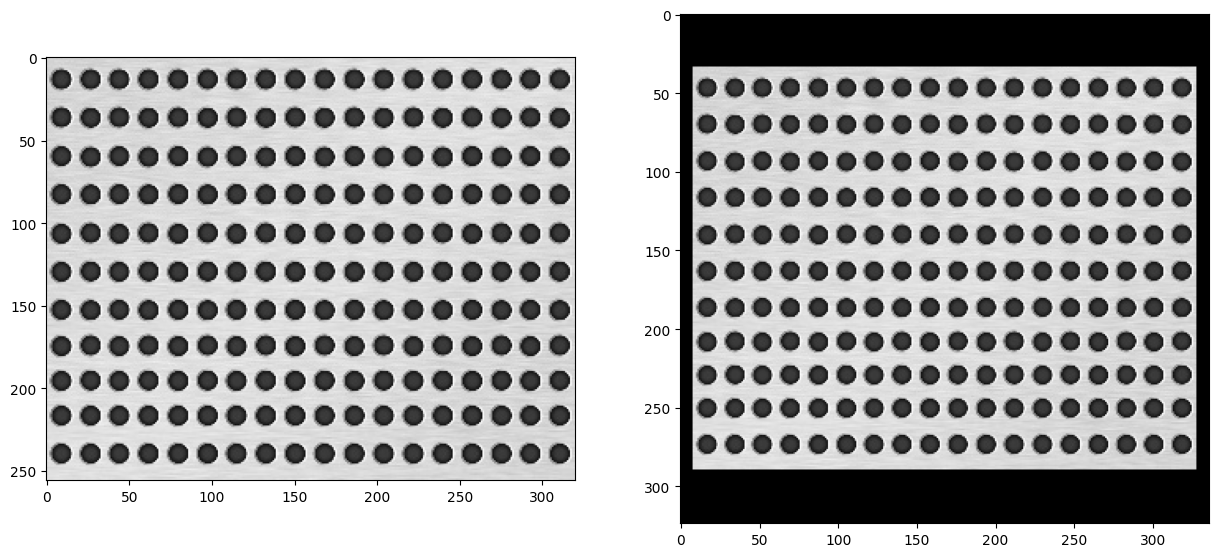

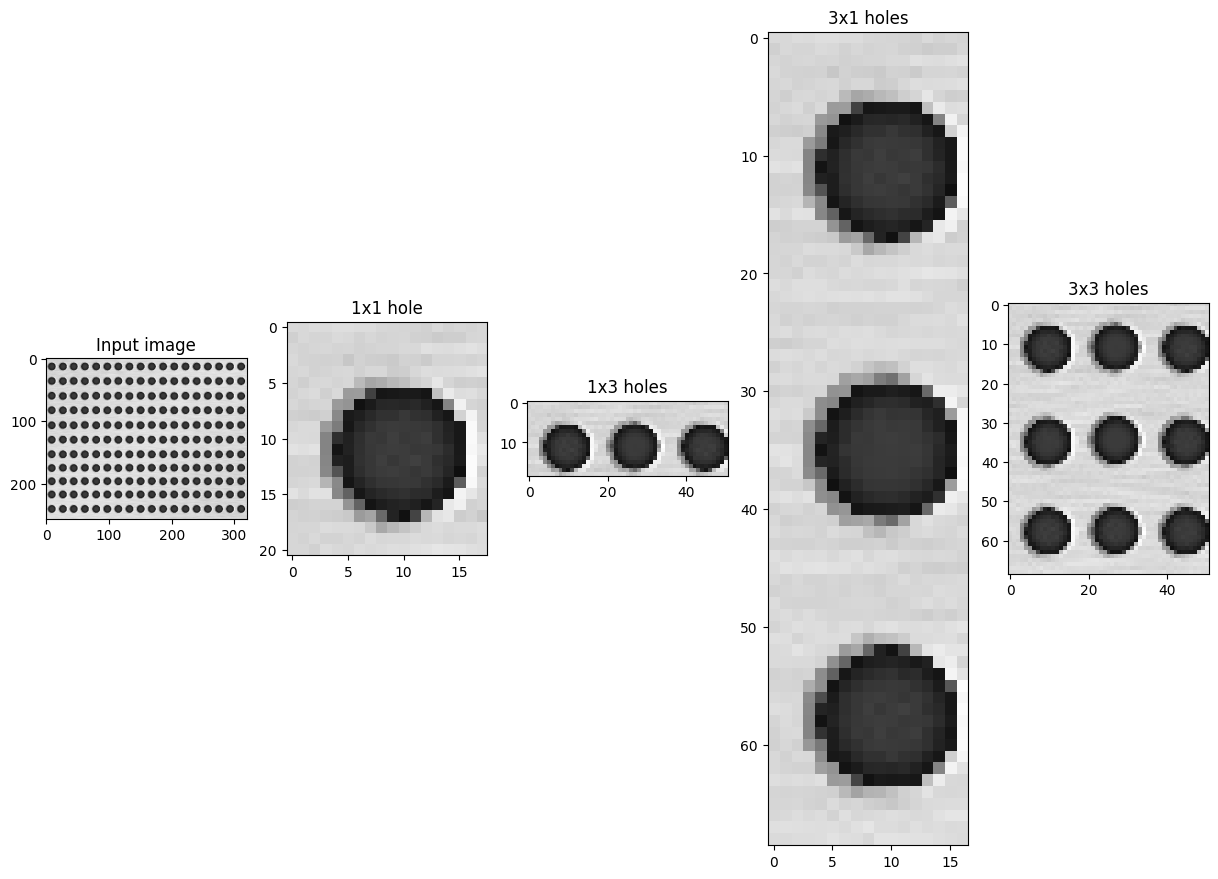

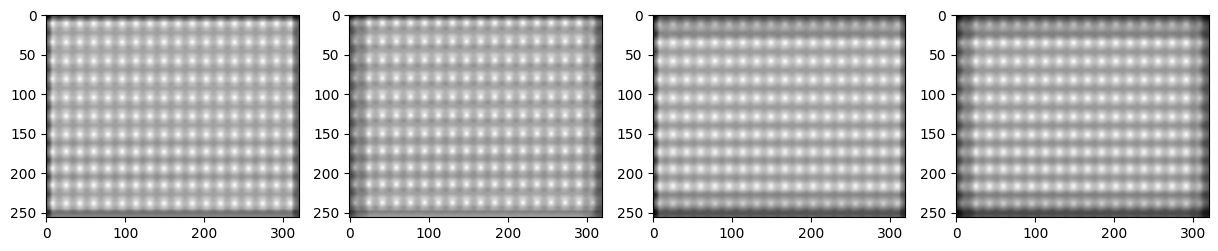

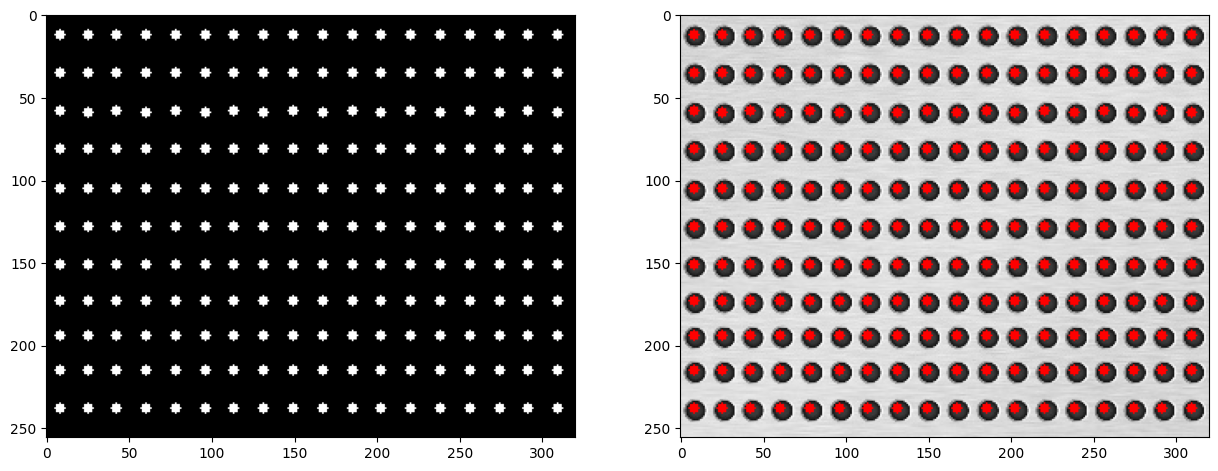

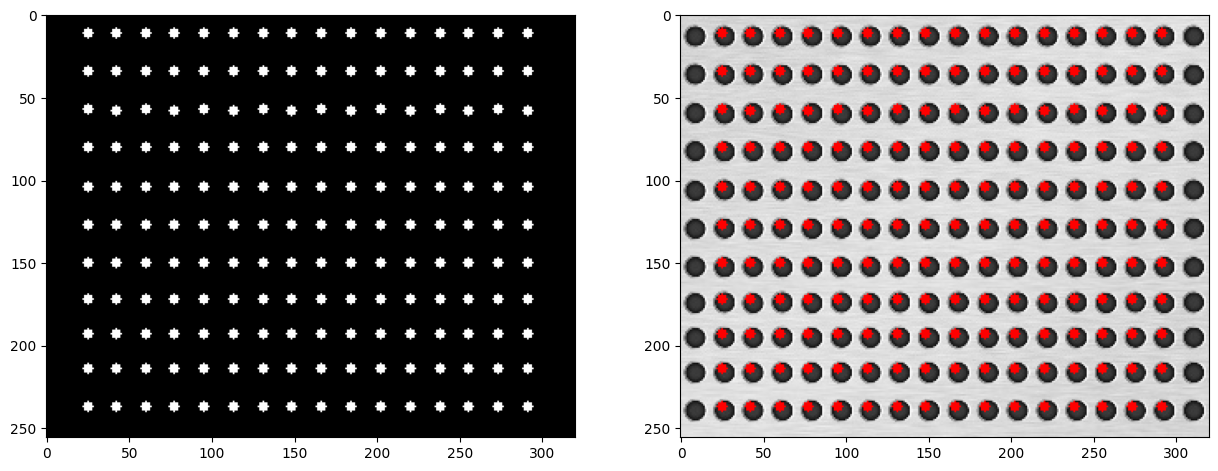

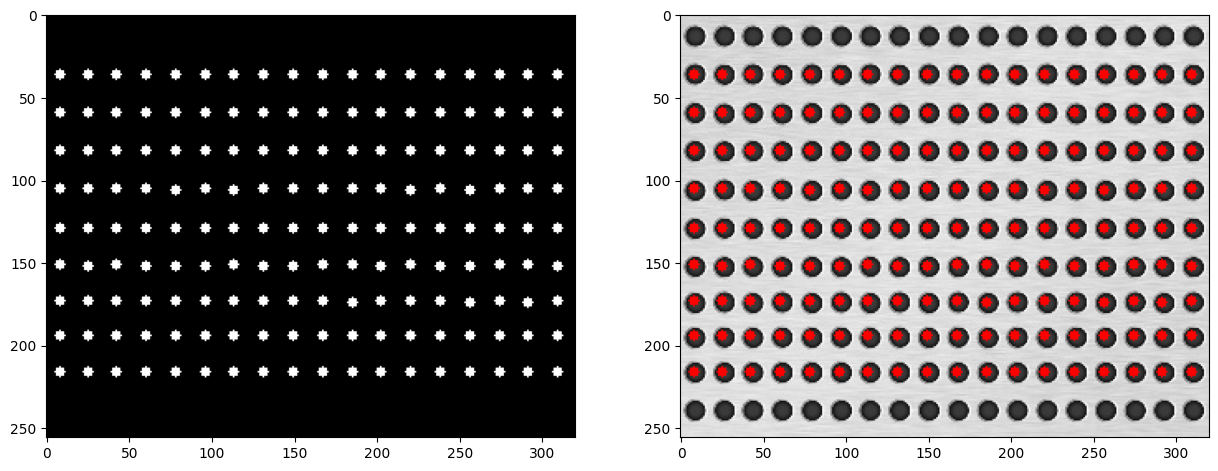

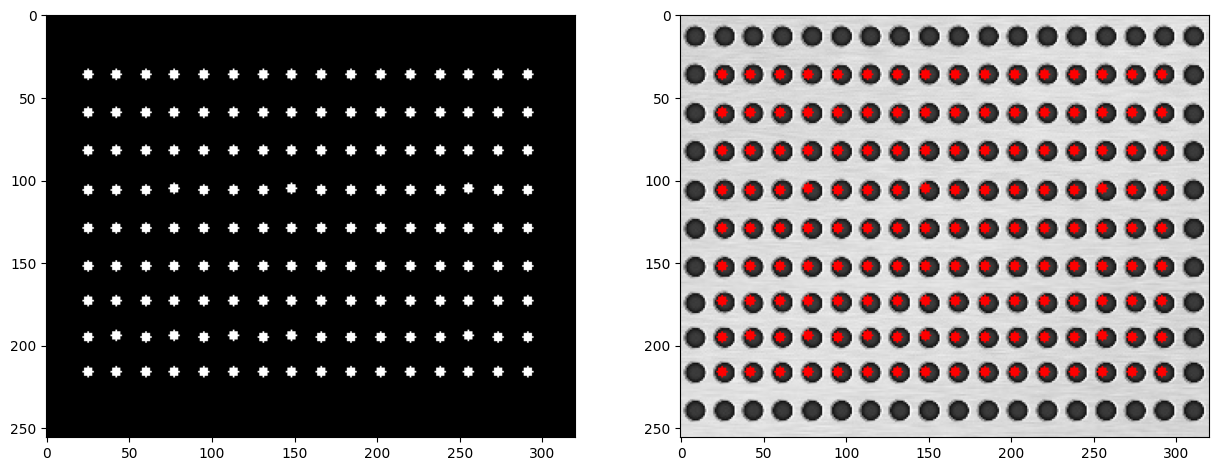

In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]
template2 = img[25:44, 17:68]
template3 = img[25:94, 17:34]
template4 = img[25:94, 17:68]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, img_pad])

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

**Goal**: Implement following functions and then run the code cells below.
- `normalized_cross_correlation_ms()`: **(10%)**

**QUESTION**: What are the benefits of subtracting the mean? **(6%)**

**ANSWER**:  When calculating cross correlation, we are interested in the variance between the template and the specific portion of the image that we are looking at currently. Hence, it makes sense to remove the mean since we primarily want to compare the spread beteen the 2 points. 

It helps to center the variation around 0, which makes it easier to detect any significant outliers or biases.

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 2.82452704124121e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.00014167735128237894


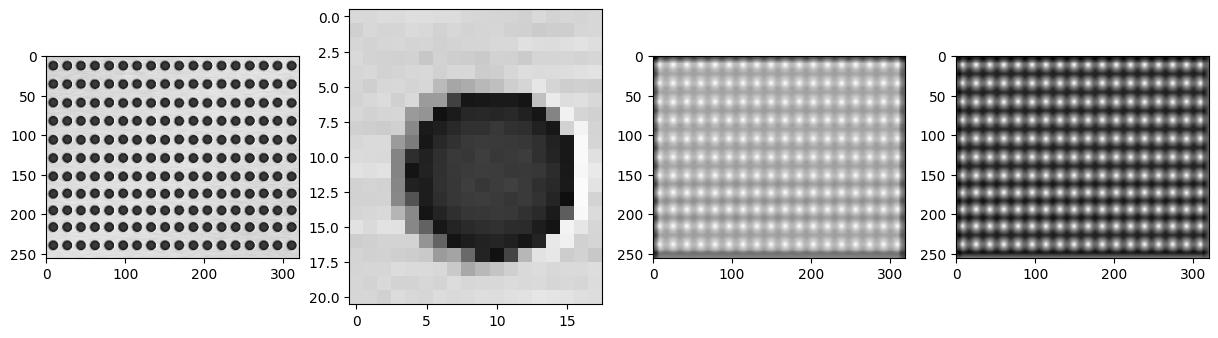

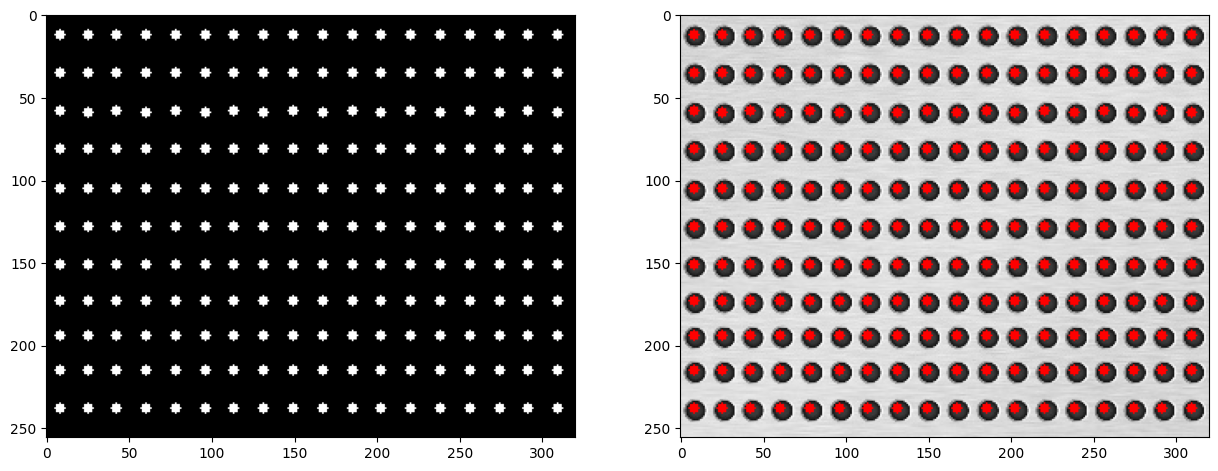

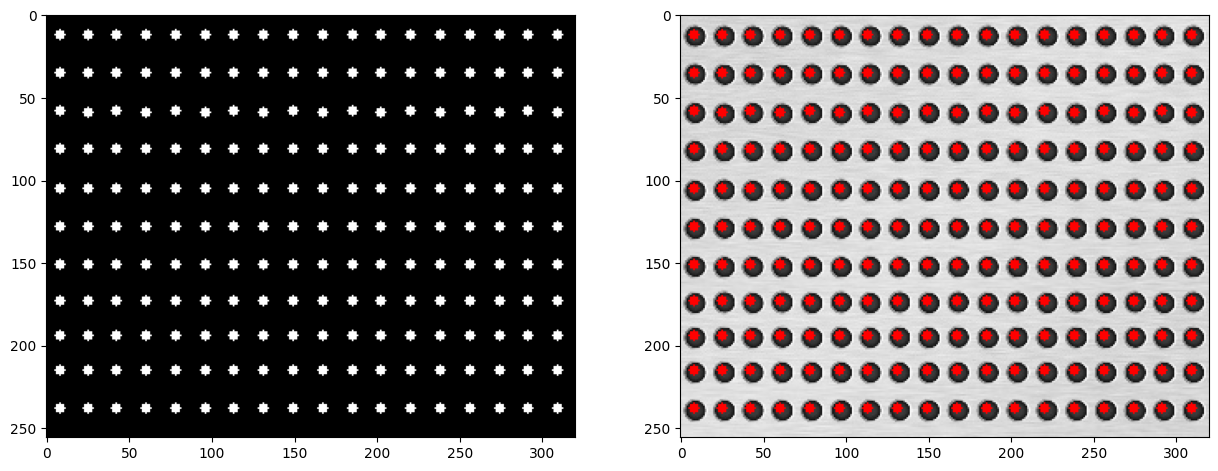

In [20]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[25:46, 17:35]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_points(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_points(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

**QUESTION**: Explain why the correlation output responses decrease as one gets further away from the center of the output. **(6%)**

**ANSWER**:  (Not sure) The correlation output decreases as we get further away from the center of the output is because less of the template is captured in other positions as compared to the centre of the output. This is because when the correlation operation returns the highest energy when the template is superimposed directly on top of the original image, leading to the output being higher.

As we go further from the image, there is a greater difference between the pixels as more of the padding area is being used in the correlation operation, leading to darker further away from the center.

Comparing the centre of the output to the sides – the sides are more likely to contain noise and values that differ from the template, (affected by other non-template portions of the input)


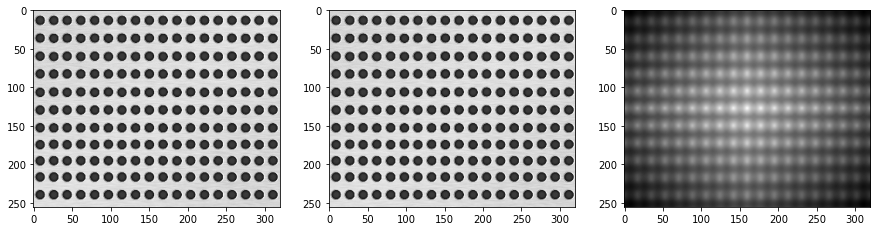

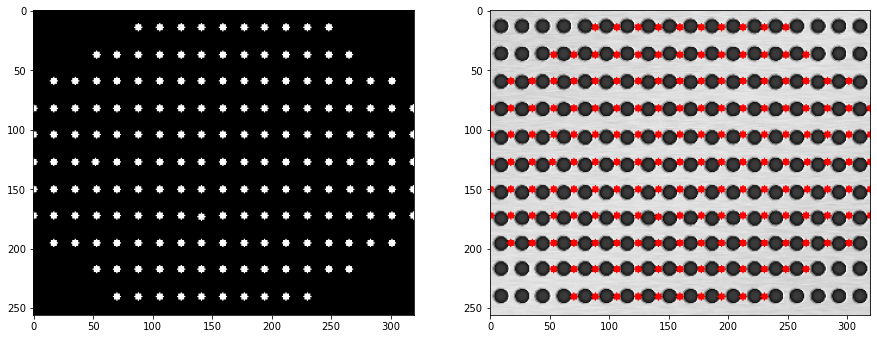

In [8]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])



res = lab1.non_max_suppression(response, (13, 13), threshold=0.6)
lab1.show_img_with_points(res, img_ori=img)

### 4.6 Limitations (6%)

**QUESTION**: Observe the outputs and explain why template matching fails in certain regions of the image. **(6%)**

**ANSWER**: The template that was selected included some background as well. The brown background could have affected the correlation calculated for certain points in the image. For example, we are unable to see the brown floor for the distant chairs, hence there are significantly lower number of matches for the further chairs. 

Also, as the chairs which are further from the camera, the correlation operation is less strong as the pixel dimensions that these chairs occupy is significantly lesser than the dimensions that the template occupies, hence leading to a lower correlation output.

Beyond that, the chairs in the picture are not uniform. The different angle of some of the chairs makes image matching difficult. This is why most of the nearer chairs managed to match with the template.  We expect to see more of the further chairs match, if they were used as a template instead


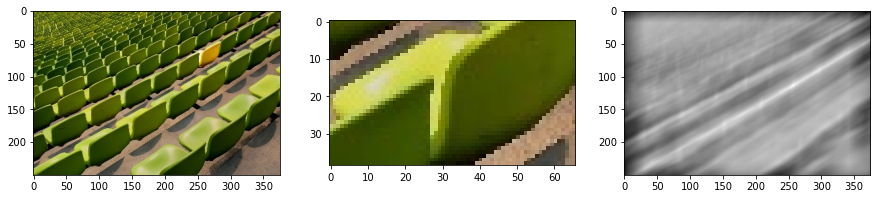

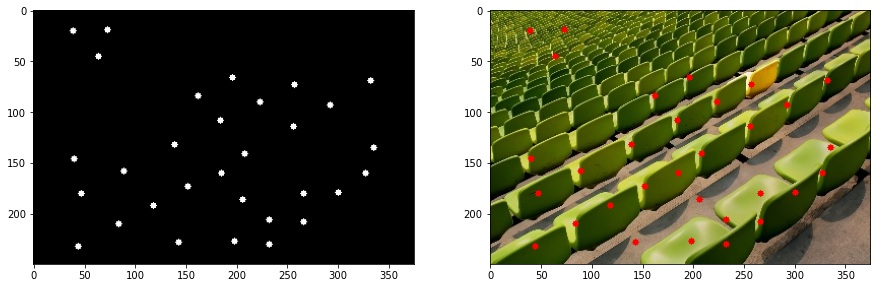

In [9]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'chairs.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[95:134, 224:290]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_points(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**